## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.datasets import load_iris, load_breast_cancer

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

np.random.seed(42)

## 2. Understanding Logistic Regression

### Theory
Unlike linear regression (predicts continuous values), logistic regression predicts **probabilities** for classification.

**Sigmoid Function**: $\sigma(z) = \frac{1}{1 + e^{-z}}$

Where: $z = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$

**Output**: Probability between 0 and 1

**Decision Rule**: 
- If $P(y=1) \geq 0.5$ → Predict class 1
- If $P(y=1) < 0.5$ → Predict class 0

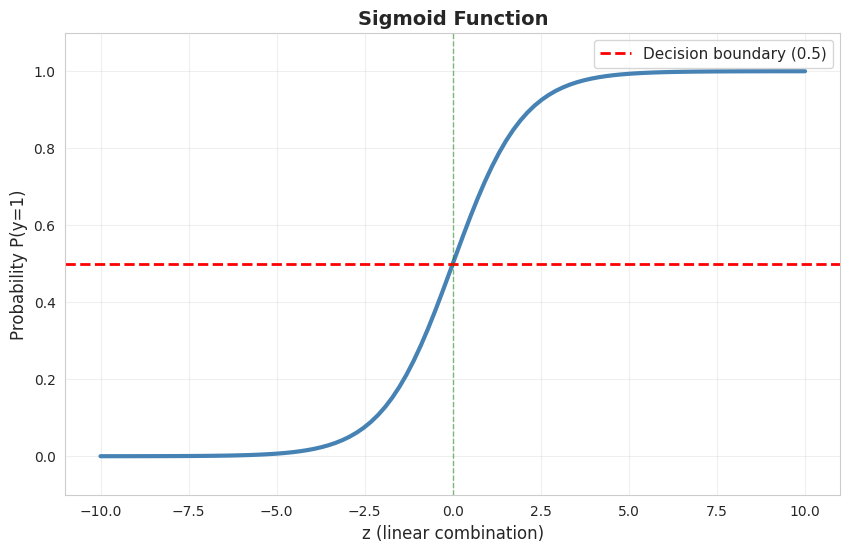

Key Properties:
• Outputs values between 0 and 1
• S-shaped curve
• When z=0, sigmoid(z)=0.5
• As z→∞, sigmoid(z)→1
• As z→-∞, sigmoid(z)→0


In [2]:
# Visualize sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, linewidth=3, color='steelblue')
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Decision boundary (0.5)')
plt.axvline(x=0, color='green', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('z (linear combination)', fontsize=12)
plt.ylabel('Probability P(y=1)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.1, 1.1)
plt.show()

print("Key Properties:")
print("• Outputs values between 0 and 1")
print("• S-shaped curve")
print("• When z=0, sigmoid(z)=0.5")
print("• As z→∞, sigmoid(z)→1")
print("• As z→-∞, sigmoid(z)→0")

## 3. Binary Classification Example

Let's use the Breast Cancer dataset to predict malignant vs. benign tumors.

In [3]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

print("Dataset Information:")
print(f"Shape: {X.shape}")
print(f"\nTarget classes: {cancer.target_names}")
print(f"  0 = malignant (cancerous)")
print(f"  1 = benign (non-cancerous)")
print(f"\nClass distribution:")
print(f"  Malignant: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  Benign: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")
print(f"\nFirst 5 samples:")
display(X.head())

Dataset Information:
Shape: (569, 30)

Target classes: ['malignant' 'benign']
  0 = malignant (cancerous)
  1 = benign (non-cancerous)

Class distribution:
  Malignant: 212 (37.3%)
  Benign: 357 (62.7%)

First 5 samples:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 4. Data Preprocessing

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\nTraining class distribution:")
print(f"  Malignant: {(y_train==0).sum()}")
print(f"  Benign: {(y_train==1).sum()}")

Training set: 455 samples
Test set: 114 samples

Training class distribution:
  Malignant: 170
  Benign: 285


In [5]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled successfully!")

✅ Features scaled successfully!


## 5. Train Logistic Regression Model

In [6]:
# Create and train logistic regression
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Get probability predictions
y_train_proba = log_reg.predict_proba(X_train_scaled)
y_test_proba = log_reg.predict_proba(X_test_scaled)

print("✅ Model trained successfully!")
print(f"\nModel intercept: {log_reg.intercept_[0]:.4f}")
print(f"Number of features: {len(log_reg.coef_[0])}")

✅ Model trained successfully!

Model intercept: 0.3022
Number of features: 30


## 6. Model Evaluation

In [7]:
def evaluate_classification_model(y_true, y_pred, y_proba=None, set_name=''):
    """
    Comprehensive classification evaluation
    """
    print(f"{'='*60}")
    print(f"{set_name} Metrics:")
    print(f"{'='*60}")
    
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # AUC if probabilities provided
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba[:, 1])
        print(f"ROC-AUC:   {auc:.4f}")
    
    print("\n" + "="*60)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Evaluate on both sets
train_metrics = evaluate_classification_model(
    y_train, y_train_pred, y_train_proba, "Training Set"
)

test_metrics = evaluate_classification_model(
    y_test, y_test_pred, y_test_proba, "Test Set"
)

Training Set Metrics:
Accuracy:  0.9890
Precision: 0.9861
Recall:    0.9965
F1-Score:  0.9913
ROC-AUC:   0.9975

Test Set Metrics:
Accuracy:  0.9825
Precision: 0.9861
Recall:    0.9861
F1-Score:  0.9861
ROC-AUC:   0.9954



## 7. Confusion Matrix

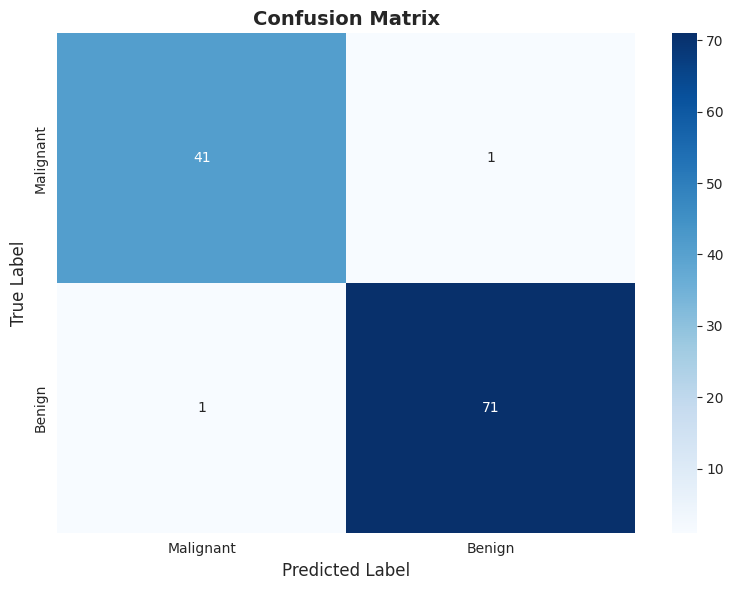


Confusion Matrix Breakdown:
True Negatives (TN):  41 - Correctly identified malignant
False Positives (FP): 1 - Malignant predicted as benign (Type I error)
False Negatives (FN): 1 - Benign predicted as malignant (Type II error)
True Positives (TP):  71 - Correctly identified benign

⚠️  Critical: False Negatives are dangerous in medical diagnosis!
    Missing a malignant tumor (FN) is worse than false alarm (FP)


In [8]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Explain confusion matrix
tn, fp, fn, tp = cm.ravel()
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {tn} - Correctly identified malignant")
print(f"False Positives (FP): {fp} - Malignant predicted as benign (Type I error)")
print(f"False Negatives (FN): {fn} - Benign predicted as malignant (Type II error)")
print(f"True Positives (TP):  {tp} - Correctly identified benign")

print(f"\n⚠️  Critical: False Negatives are dangerous in medical diagnosis!")
print(f"    Missing a malignant tumor (FN) is worse than false alarm (FP)")

## 8. Classification Report

In [9]:
print("Detailed Classification Report:")
print("="*60)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Malignant', 'Benign']))

print("\nMetric Definitions:")
print("• Precision: Of all positive predictions, how many were correct?")
print("• Recall: Of all actual positives, how many did we catch?")
print("• F1-Score: Harmonic mean of precision and recall")
print("• Support: Number of actual occurrences of the class")

Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Metric Definitions:
• Precision: Of all positive predictions, how many were correct?
• Recall: Of all actual positives, how many did we catch?
• F1-Score: Harmonic mean of precision and recall
• Support: Number of actual occurrences of the class


## 9. ROC Curve and AUC

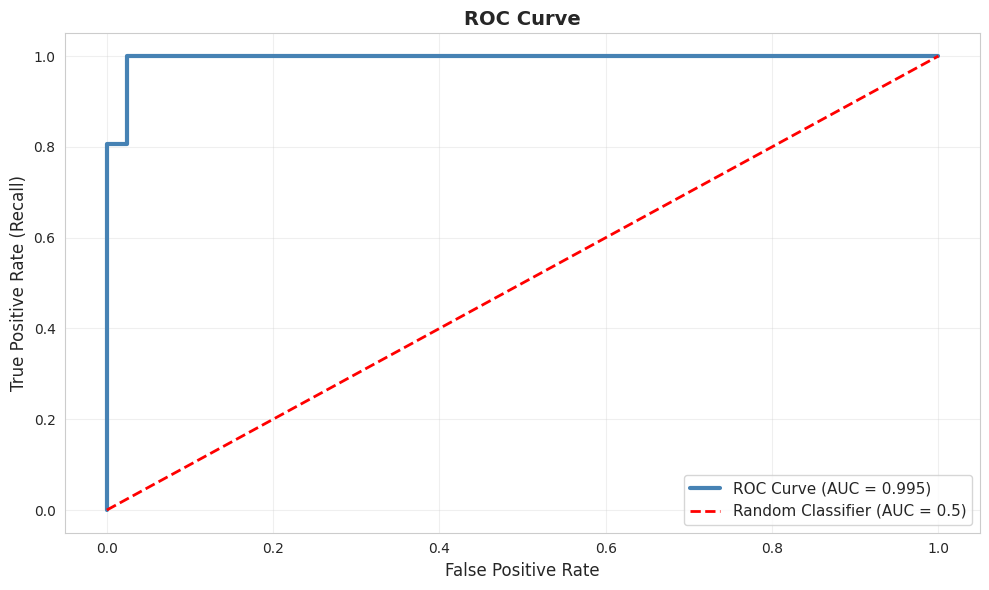


ROC-AUC Interpretation:
• AUC = 0.995
  → Excellent classifier! 🌟

• AUC = 1.0: Perfect classifier
• AUC = 0.5: Random guessing
• AUC < 0.5: Worse than random (predictions inverted)


In [10]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_test_proba[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='steelblue', linewidth=3, 
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, 
         label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC-AUC Interpretation:")
print(f"• AUC = {roc_auc:.3f}")
if roc_auc > 0.9:
    print("  → Excellent classifier! 🌟")
elif roc_auc > 0.8:
    print("  → Good classifier! ✅")
elif roc_auc > 0.7:
    print("  → Fair classifier ⚠️")
else:
    print("  → Poor classifier ❌")
    
print("\n• AUC = 1.0: Perfect classifier")
print("• AUC = 0.5: Random guessing")
print("• AUC < 0.5: Worse than random (predictions inverted)")

## 10. Feature Importance

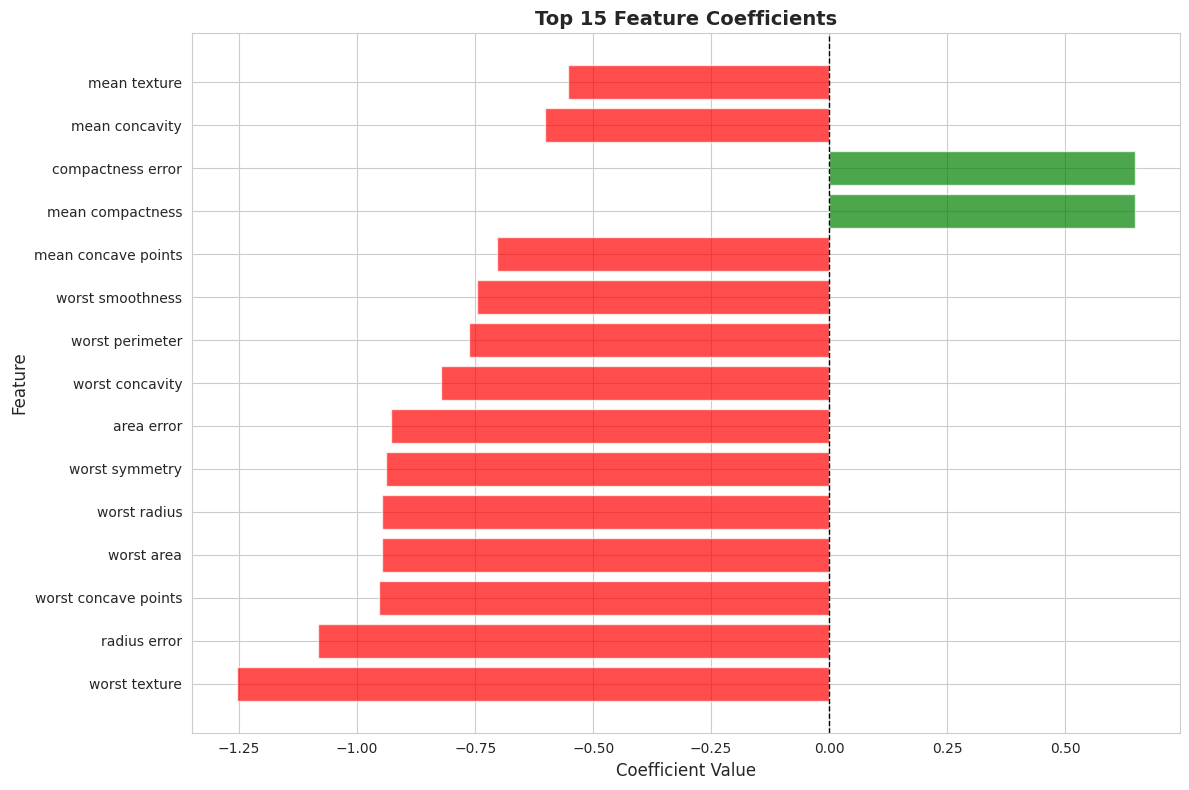


Interpretation:
• Positive coefficient → increases probability of benign
• Negative coefficient → increases probability of malignant
• Larger magnitude → more important feature


In [11]:
# Get feature coefficients
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

# Plot top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Coefficients', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("• Positive coefficient → increases probability of benign")
print("• Negative coefficient → increases probability of malignant")
print("• Larger magnitude → more important feature")

## 11. Multi-Class Classification

Let's use the Iris dataset for 3-class classification.

In [12]:
# Load iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris Dataset:")
print(f"Classes: {iris.target_names}")
print(f"Features: {iris.feature_names}")
print(f"Samples per class: {np.bincount(y_iris)}")

Iris Dataset:
Classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Samples per class: [50 50 50]


In [13]:
# Split and scale
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

# Train multi-class logistic regression
log_reg_multi = LogisticRegression(multi_class='ovr', random_state=42, max_iter=10000)
log_reg_multi.fit(X_train_iris_scaled, y_train_iris)

# Predictions
y_pred_iris = log_reg_multi.predict(X_test_iris_scaled)

print("\n✅ Multi-class model trained!")
print(f"Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.4f}")


✅ Multi-class model trained!
Accuracy: 0.9000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


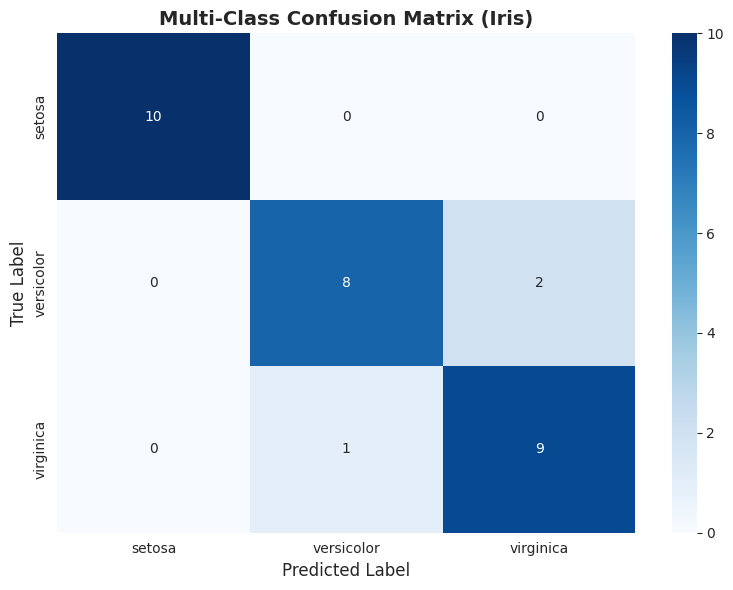


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [14]:
# Multi-class confusion matrix
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Multi-Class Confusion Matrix (Iris)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, 
                          target_names=iris.target_names))

## 12. Regularization in Logistic Regression

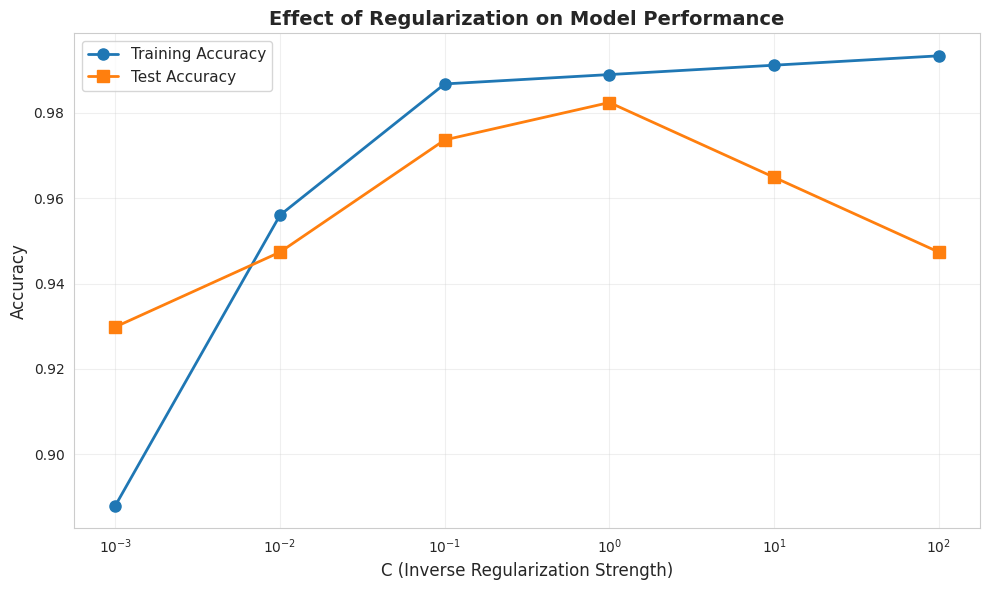


Regularization Insights:
• Small C (high regularization): Prevents overfitting, may underfit
• Large C (low regularization): More flexible, may overfit
• Look for C where test accuracy is highest

Best C value: 1.0


In [15]:
# Compare different regularization strengths (C parameter)
# Note: C is inverse of regularization strength (smaller C = more regularization)

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores = []
test_scores = []

for C in C_values:
    model = LogisticRegression(C=C, random_state=42, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    
    train_scores.append(model.score(X_train_scaled, y_train))
    test_scores.append(model.score(X_test_scaled, y_test))

# Plot regularization effect
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, marker='o', linewidth=2, 
             markersize=8, label='Training Accuracy')
plt.semilogx(C_values, test_scores, marker='s', linewidth=2, 
             markersize=8, label='Test Accuracy')
plt.xlabel('C (Inverse Regularization Strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of Regularization on Model Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRegularization Insights:")
print("• Small C (high regularization): Prevents overfitting, may underfit")
print("• Large C (low regularization): More flexible, may overfit")
print("• Look for C where test accuracy is highest")
print(f"\nBest C value: {C_values[np.argmax(test_scores)]}")

## 13. Probability Calibration

In [17]:
# Show probability predictions for test samples
sample_indices = [0, 10, 20, 30, 40]

print("Sample Predictions with Probabilities:")
print("="*70)

for idx in sample_indices:
    actual = 'Benign' if y_test[idx] == 1 else 'Malignant'
    predicted = 'Benign' if y_test_pred[idx] == 1 else 'Malignant'
    prob_malignant = y_test_proba[idx, 0]
    prob_benign = y_test_proba[idx, 1]
    
    print(f"\nSample {idx}:")
    print(f"  Actual: {actual}")
    print(f"  Predicted: {predicted}")
    print(f"  P(Malignant) = {prob_malignant:.4f}")
    print(f"  P(Benign) = {prob_benign:.4f}")
    print(f"  Confidence: {max(prob_malignant, prob_benign):.2%}")

Sample Predictions with Probabilities:

Sample 0:
  Actual: Malignant
  Predicted: Malignant
  P(Malignant) = 1.0000
  P(Benign) = 0.0000
  Confidence: 100.00%

Sample 10:
  Actual: Benign
  Predicted: Benign
  P(Malignant) = 0.0108
  P(Benign) = 0.9892
  Confidence: 98.92%

Sample 20:
  Actual: Malignant
  Predicted: Malignant
  P(Malignant) = 0.9983
  P(Benign) = 0.0017
  Confidence: 99.83%

Sample 30:
  Actual: Benign
  Predicted: Benign
  P(Malignant) = 0.0081
  P(Benign) = 0.9919
  Confidence: 99.19%

Sample 40:
  Actual: Benign
  Predicted: Benign
  P(Malignant) = 0.0001
  P(Benign) = 0.9999
  Confidence: 99.99%


## 🎯 Key Takeaways

1. **Logistic Regression**:
   - Used for classification (not regression!)
   - Outputs probabilities using sigmoid function
   - Can handle binary and multi-class problems
   - Interpretable coefficients

2. **Evaluation Metrics**:
   - **Accuracy**: Overall correctness (can be misleading with imbalanced classes)
   - **Precision**: Of positive predictions, how many are correct?
   - **Recall**: Of actual positives, how many did we find?
   - **F1-Score**: Balance between precision and recall
   - **ROC-AUC**: Overall classifier quality across thresholds

3. **Confusion Matrix**: Essential for understanding errors

4. **Regularization**: C parameter controls overfitting

5. **Multi-Class**: One-vs-Rest (OvR) or Multinomial strategies

## 📝 Practice Exercises

1. Try different decision thresholds (not just 0.5)
2. Experiment with different regularization strengths
3. Handle imbalanced datasets using class_weight parameter
4. Compare L1 (penalty='l1') vs L2 regularization
5. Use cross-validation to find optimal hyperparameters

**Next**: Move to `03_random_forest.ipynb` to learn ensemble methods!